# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
!pip install --upgrade pip
!pip install spacy
!python -m spacy download en_core_web_lg
!pip install --upgrade seaborn
#!pip install -U numpy==1.18

    100% |████████████████████████████████| 1.7MB 9.9MB/s eta 0:00:01    71% |███████████████████████         | 1.2MB 21.7MB/s eta 0:00:01
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1
     |████████████████████████████████| 6.0 MB 5.4 MB/s            
     |████████████████████████████████| 451 kB 25.2 MB/s            
     |████████████████████████████████| 10.2 MB 22.5 MB/s            
     |████████████████████████████████| 9.9 MB 19.2 MB/s            
     |████████████████████████████████| 14.8 MB 25.8 MB/s            
     |████████████████████████████████| 42 kB 1.8 MB/s             
     |████████████████████████████████| 181 kB 24.7 MB/s            
     |████████████████████████████████| 629 kB 22.8 MB/s            
     |████████████████████████████████| 76 kB 6.1 MB/s             
     |████████████████████████████████| 40 kB 6.4 MB/s             
     |████████████████████████████████| 127 kB 17.4 MB/s          

In [2]:
# import libraries
import json
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import re
import pickle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn import preprocessing
import spacy
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from nltk.corpus import stopwords
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import warnings
import joblib
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger'])

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of ty

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
# load data from database
engine = create_engine('sqlite:///disasterResponse_db.db')
df = pd.read_sql_table('disasterResponse_db_table', engine)
X = df['message']
Y = df.iloc[:,5:]

In [4]:
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update cold front Cuba could pass Haiti,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is Hurricane,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 8090 destroyed Only Hospita...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,says west side Haiti rest country today tonight,facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information National Palace,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm sacred heart jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,Please need tents water We Silo Thank,Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,I would like receive messages thank,Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I CroixdesBouquets We health issues They worke...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


### 2. Write a tokenization function to process your text data

In [5]:
def tokenize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    
    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### Plot Class Distribution

In [6]:
class_dist = pd.DataFrame(Y.sum()/len(Y))
class_dist.reset_index(inplace=True)
class_dist.rename({'index': 'labels',0:'percentage'}, axis=1, inplace=True)
class_dist.sort_values(by=['percentage'], ascending=False)

,labels,percentage
2,aid_related,0.414251
27,weather_related,0.278341
34,direct_report,0.193584
0,request,0.170659
17,other_aid,0.131446
10,food,0.111497
31,earthquake,0.093645
29,storm,0.093187
11,shelter,0.088267
28,floods,0.082202


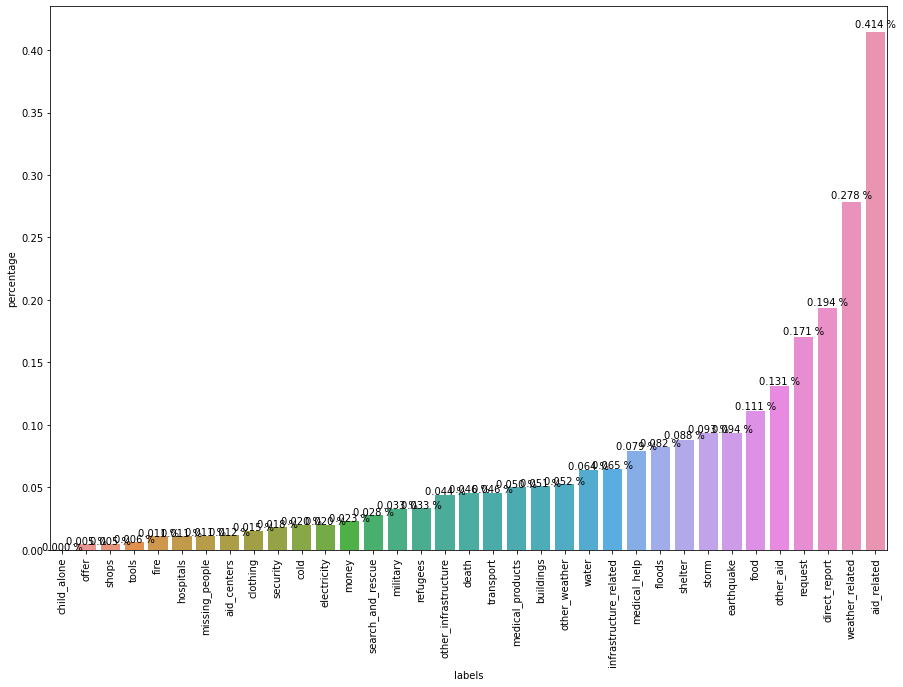

In [7]:
import seaborn as sns
import numpy as np
def show_values(axs, orient="v", space=.01):
    
    def _single(ax):

        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f} %'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        

plt.gcf().set_size_inches(15.0, 10)
       
#create vertical barplot
p=sns.barplot(x='labels', y="percentage", data=class_dist[(class_dist.labels != 'related')].sort_values(by='percentage'),ci=None)
p.set_xticklabels(p.get_xticklabels(),rotation = 90)


#show values on barplot
show_values(p)



### Label Distribution

In [8]:
Y.apply(pd.value_counts).T

,0,1
request,21742.0,4474.0
offer,26098.0,118.0
aid_related,15356.0,10860.0
medical_help,24132.0,2084.0
medical_products,24903.0,1313.0
search_and_rescue,25492.0,724.0
security,25745.0,471.0
military,25356.0,860.0
child_alone,26216.0,NaN
water,24544.0,1672.0


### Drop Columns

In [9]:
Y.drop(columns=['child_alone'], axis=1, inplace=True)

### Target variable correlation heatmap

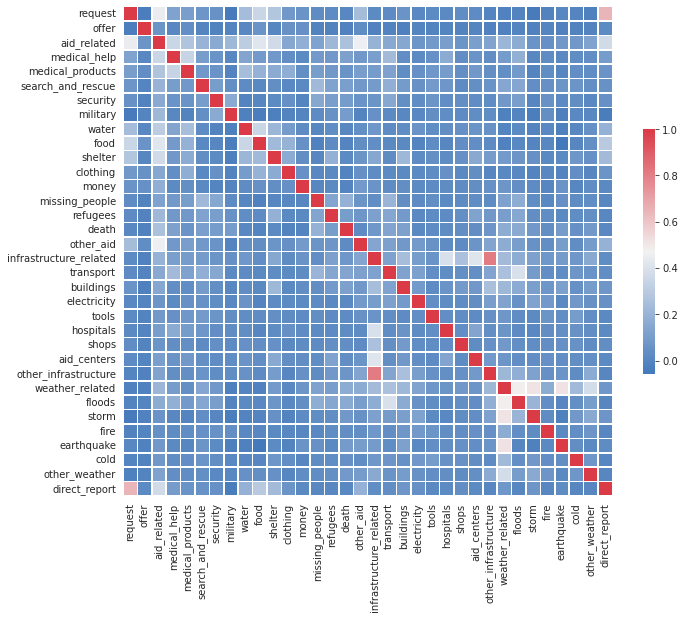

In [10]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(Y.corr(), dropDuplicates = False)

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [11]:
# Create baseline model to compare performance

baseline_pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(DummyClassifier(strategy="uniform"))),
    ])

In [12]:
pipeline = Pipeline([
        ('vect', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('clf', MultiOutputClassifier(RandomForestClassifier())),
    ])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33,
                                                    #stratify = Y, # One of the classes has only one observation
                                                    random_state = 42)

In [14]:
X_train.head()

22622    The Medan Chapter Taiwan Buddhist Tzu Chi Foun...
4828     I flooded PortauPrince Now I live Gonaives I n...
12505    SPCA made sure doggie Manhattan emergency stas...
5027     I went digicel offices find motorola Wx 160 I ...
18022    Delivery 41 tons therapeutic milk 15 tons Plum...
Name: message, dtype: object

In [15]:
y_train.head(n=10).T

,22622,4828,12505,5027,18022,10898,14314,8583,10342,12101
request,0,1,0,0,0,0,0,0,0,1
offer,0,0,0,0,0,1,0,0,0,0
aid_related,1,1,1,0,0,1,0,0,0,1
medical_help,0,0,0,0,0,0,0,0,0,0
medical_products,0,0,0,0,0,0,0,0,0,0
search_and_rescue,0,0,0,0,0,0,0,0,0,0
security,0,0,0,0,0,0,0,0,0,0
military,0,0,0,0,0,0,0,0,0,0
water,0,0,0,0,0,0,0,0,0,0
food,0,0,1,0,0,1,0,0,0,0


### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [16]:
from os.path import exists

if exists('baseline_pipeline.pkl'):
    print('Baseline Pipeline exists - Loading pickle file')
    baseline_pipeline = joblib.load('baseline_pipeline.pkl')
else:
    print('Baseline Pipeline Fitting...')
    baseline_pipeline.fit(X_train, y_train)
    joblib.dump(pipeline, 'pipeline.pkl')

Baseline Pipeline exists - Loading pickle file


In [17]:
from os.path import exists

if exists('pipeline.pkl'):
    print('Pipeline exists - Loading pickle file')
    pipeline = joblib.load('pipeline.pkl')
else:
    print('Pipeline Fitting...')
    pipeline.fit(X_train, y_train)
    joblib.dump(pipeline, 'pipeline.pkl')

Pipeline exists - Loading pickle file


In [18]:
"""
Github: https://github.com/atwahsz/Disaster-Response-Pipeline/blob/master/ML%20Pipeline%20Preparation.ipynb
"""
def eval_metrics(ArrayL, ArrayP, col_names):
    """Evalute metrics of the ML pipeline model
    
    Inputs:
    ArrayL: array. Array containing the real labels.
    ArrayP: array. Array containing predicted labels.
    col_names: list of strings. List containing names for each of the ArrayP fields.
       
    Returns:
    data_metrics: Contains accuracy, precision, recall 
    and f1 score for a given set of ArrayL and ArrayP labels.
    """
    metrics = []
    
    # Evaluate metrics for each set of labels
    for i in range(len(col_names)):
        accuracy = accuracy_score(ArrayL[:, i], ArrayP[:, i])
        precision = precision_score(ArrayL[:, i], ArrayP[:, i], average='micro', labels = np.unique(ArrayP))
        recall = recall_score(ArrayL[:, i], ArrayP[:, i], average='micro',labels = np.unique(ArrayP))
        f1 = f1_score(ArrayL[:, i], ArrayP[:, i],average='micro', labels = np.unique(ArrayP))
        
        metrics.append([accuracy, precision, recall, f1])
    
    # store metrics
    metrics = np.array(metrics)
    data_metrics = pd.DataFrame(data = metrics, index = col_names, columns = ['Accuracy', 'Precision', 'Recall', 'F1'])
      
    return data_metrics    

### Calculate perfomrnace

In [19]:
def performance_calculation(pipeline          = None, 
                            baseline_pipeline = None, 
                            train_set         = None, 
                            test_set          = None, 
                            y_train_true      = None, 
                            y_test_true       = None):
    """
    Performance calculation using relative difference in %. 
    Formula: performance = [(y - y_pred) / y_pred] * 100
    
    Inputs:
    
    """
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred  = pipeline.predict(X_test)
    
    y_train_pred_baseline = baseline_pipeline.predict(X_train)
    y_test_pred_baseline  = baseline_pipeline.predict(X_test)
    
    col_names = list(y_train_true.columns.values)
    
    train_performance = eval_metrics(np.array(y_train_true), y_train_pred, col_names)
    test_performance = eval_metrics(np.array(y_test_true), y_test_pred, col_names)
    
    train_baseline_performance = eval_metrics(np.array(y_train_true), y_train_pred_baseline, col_names)
    test_baseline_performance = eval_metrics(np.array(y_test_true), y_test_pred_baseline, col_names)
    
    relative_error = (np.abs((train_performance - test_performance))/train_performance)*100
    
    relative_error_train_baseline = (np.abs((train_performance - train_baseline_performance))/train_performance)*100
    
    relative_error_test_baseline = (np.abs((test_performance - test_baseline_performance))/test_performance)*100

    
    return relative_error, relative_error_train_baseline, relative_error_test_baseline

In [20]:
relative_error_table_train_test, relative_error_train_baseline ,relative_error_test_baseline = performance_calculation(
                                               pipeline          = pipeline, 
                                               baseline_pipeline = baseline_pipeline, 
                                               train_set         = X_train, 
                                               test_set          = X_test, 
                                               y_train_true      = y_train, 
                                               y_test_true       = y_test)

### Relative error (%): Train-Test

The relative error is calculated using the following formula: **(y_train_pred - y_test_pred) / y_train_pred*100**

In [21]:
display(relative_error_table_train_test.style.background_gradient(axis=0, cmap='YlOrRd'))

,Accuracy,Precision,Recall,F1
request,21.0826,21.0826,21.0826,21.0826
offer,8.68423,8.68423,8.68423,8.68423
aid_related,0.674594,0.674594,0.674594,0.674594
medical_help,2.28925,2.28925,2.28925,2.28925
medical_products,2.16096,2.16096,2.16096,2.16096
search_and_rescue,3.61204,3.61204,3.61204,3.61204
security,1.56844,1.56844,1.56844,1.56844
military,0.948542,0.948542,0.948542,0.948542
water,2.53965,2.53965,2.53965,2.53965
food,0.390115,0.390115,0.390115,0.390115


In [22]:
display(relative_error_train_baseline.style.background_gradient(axis=0, cmap='YlOrRd'))

,Accuracy,Precision,Recall,F1
request,16.8099,16.8099,16.8099,16.8099
offer,40.5832,40.5832,40.5832,40.5832
aid_related,15.1486,15.1486,15.1486,15.1486
medical_help,25.5685,25.5685,25.5685,25.5685
medical_products,45.4377,45.4377,45.4377,45.4377
search_and_rescue,46.2992,46.2992,46.2992,46.2992
security,48.0552,48.0552,48.0552,48.0552
military,47.4312,47.4312,47.4312,47.4312
water,44.3804,44.3804,44.3804,44.3804
food,43.9149,43.9149,43.9149,43.9149


In [23]:
display(relative_error_test_baseline.style.background_gradient(axis=0, cmap='YlOrRd'))

,Accuracy,Precision,Recall,F1
request,4.89871,4.89871,4.89871,4.89871
offer,45.1695,45.1695,45.1695,45.1695
aid_related,14.8815,14.8815,14.8815,14.8815
medical_help,26.7918,26.7918,26.7918,26.7918
medical_products,46.7469,46.7469,46.7469,46.7469
search_and_rescue,48.7558,48.7558,48.7558,48.7558
security,49.0032,49.0032,49.0032,49.0032
military,48.294,48.294,48.294,48.294
water,46.0908,46.0908,46.0908,46.0908
food,43.4738,43.4738,43.4738,43.4738


### 6. Improve your model
Use grid search to find better parameters. 

In [33]:
"""
Github: https://github.com/atwahsz/Disaster-Response-Pipeline/blob/master/ML%20Pipeline%20Preparation.ipynb
"""

# Defining median F1_score
def eval_metric_f1(y_true, y_pred):
    """Calculate median F1 score for all of the output classifiers
    
    Args:
    y_true: array. Array containing actual labels.
    y_pred: array. Array containing predicted labels.
        
    Returns:
    score: float. Median F1 score for all of the output classifiers
    """
    f1_metric = []
    for i in range(np.shape(y_pred)[1]):
        f1 = f1_score(np.array(y_true)[:, i], y_pred[:, i],average='micro')
        f1_metric.append(f1)

    return np.median(f1_metric)

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# Hyper-parameters dictionary
# param_grid = {'vect__min_df': [1, 5],
#               'vect__max_df': (0.5, 0.75),
#               'vect__ngram_range': ((1, 1), (1, 2)),              
#               'clf__estimator__n_estimators':[10, 20, 30]}

param_grid = {   
    # -------------------- CLF ------------------------------
    # randomly sample numbers from 4 to 204 estimators
    'clf__estimator__n_estimators': randint(4,20),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'clf__estimator__max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'clf__estimator__min_samples_split': uniform(0.01, 0.199),    
    # -------------------- Vectorizer ----------------------- 
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__max_df': ((0.5, 0.75)),   
    'vect__min_df': [1, 5]
}

if exists('pipeline_optimized.pkl'):
    print('Optimized Pipeline exists - Loading pickle file')
    pipeline_optimized = joblib.load('pipeline_optimized.pkl')
else:
    print('Pipeline Fitting...')
    test = RandomizedSearchCV(pipeline,  
                                  param_distributions = param_grid, 
                                  scoring    = make_scorer(performance_metric),
                                  cv         = 2,
                                  verbose    = 2,
                                  n_iter     = 5,
                                  n_jobs     = -1).fit(X_train, y_train)
    
    # Save pipeline
    joblib.dump(pipeline_optimized.best_estimator_, 'pipeline_optimized.pkl')

Optimized Pipeline exists - Loading pickle file


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [26]:
relative_error_table_train_test, relative_error_train_baseline, relative_error_test_baseline = performance_calculation(
                                               pipeline          = pipeline_optimized, 
                                               baseline_pipeline = baseline_pipeline, 
                                               train_set         = X_train, 
                                               test_set          = X_test, 
                                               y_train_true      = y_train, 
                                               y_test_true       = y_test)

display(relative_error_table_train_test.style.background_gradient(axis=0, cmap='YlOrRd'))

,Accuracy,Precision,Recall,F1
request,12.4805,12.4805,12.4805,12.4805
offer,4.50607,4.50607,4.50607,4.50607
aid_related,0.674755,0.674755,0.674755,0.674755
medical_help,3.59084,3.59084,3.59084,3.59084
medical_products,0.0129876,0.0129876,0.0129876,0.0129876
search_and_rescue,2.02256,2.02256,2.02256,2.02256
security,0.883881,0.883881,0.883881,0.883881
military,0.797873,0.797873,0.797873,0.797873
water,0.979859,0.979859,0.979859,0.979859
food,0.479575,0.479575,0.479575,0.479575


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class WordVectorTransformer(TransformerMixin,BaseEstimator):
    def __init__(self, model="en_core_web_lg"):
        self.model = model

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        nlp = spacy.load(self.model)
        return np.concatenate([nlp(doc).vector.reshape(1,-1) for doc in X])

In [29]:
from sklearn.multioutput     import ClassifierChain
from sklearn.linear_model    import LogisticRegression
from sklearn.decomposition   import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV

if exists('pipeline_improved.pkl'):
    print('Improved Pipeline exists - Loading pickle file')
    pipeline_improved = joblib.load('pipeline_improved.pkl')
else:
    print('Pipeline Construction.')   
    pipeline_improved = Pipeline([
        ('vect', WordVectorTransformer()),
        ('trnc_svd', TruncatedSVD()),
        ('clf_chain', ClassifierChain(LogisticRegression(solver='lbfgs', random_state=0),order='random',random_state=42))
    ])
    
    param_grid = {'trnc_svd__n_components': [5, 10, 15]}
    
    print('Pipeline Fitting.')
    pipeline_improved = GridSearchCV(pipeline_improved, 
                                     param_grid = param_grid, 
                                     scoring    = make_scorer(performance_metric),
                                     cv         = 2,
                                     verbose    = 2, 
                                     n_jobs     =-1 ).fit(X_train, y_train)

    print('Save Pipeline.')
    joblib.dump(pipeline_improved.best_estimator_, 'pipeline_improved.pkl')


Improved Pipeline exists - Loading pickle file


In [32]:
pipeline_improved

Pipeline(memory=None,
     steps=[('vect', WordVectorTransformer(model='en_core_web_lg')), ('trnc_svd', TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
       random_state=None, tol=0.0)), ('clf_chain', ClassifierChain(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
...=0.0001,
          verbose=0, warm_start=False),
        cv=None, order='random', random_state=42))])

In [ ]:
relative_error_table_train_test, relative_error_train_baseline ,relative_error_test_baseline = performance_calculation(
                                               pipeline          = pipeline_improved, 
                                               baseline_pipeline = baseline_pipeline, 
                                               train_set         = X_train, 
                                               test_set          = X_test, 
                                               y_train_true      = y_train, 
                                               y_test_true       = y_test)

display(relative_error_table_train_test.style.background_gradient(axis=0, cmap='YlOrRd'))

### 9. Export your model as a pickle file

In [ ]:
print('Save Pipeline.')
joblib.dump(pipeline_improved.best_estimator_, 'pipeline_improved.pkl')

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.